EDA(Exploratory Data Analysis)

1. Load dataset
2. Clean data(missing values,duplicates,types)
3. Treat outliers
4. univariate& bi variate and multivariate analysis
5. insights

 ### OUTLIER- A data point that is significantly different from other observations in a dataset.

 ## How outliers will come??
 1. Measurement errors 
 2. data entry mistakes
 3. wrong entries

 ## Why they are important?
 1. They can be errors
 2. They effect the data analysis 

 ## How to identify the outliers ?

 1. Statistical Methods
 
 ---->Interquartile Range(IQR)
 
 ---->z-score
 
 2. Visualization techniques 
 
 ---->Box plots
 
 ---->Scatter plots 
 
 ----->Histograms


### Univariate Analysis 

- a method that analyses a single variable to describe it's characteristics and finding patterns and summarize the data
### It involves only one variable.

### Bivariate analysis 

- it will give the relationship between two variable. It helps to find if there is an co-relation, association or connection between the 2 variables.
### It involves 2 variable(x&y).

## Multivariate Analysis 

- to understand how multiple factors interact & influence each other .
### It involves 2 or more variables
# EXAMPLE -

How our age ,income, and education level together influence the purchasing behaviour .

## ETL(Extract Transfer Load)

ELT

## EDA : < Dataset>

1. Load & Overview
2. Cleaning the data(missing ,dupes,dtypes)
3. Univariate,bivariate & multivariate analysis
4. outlier - IQR
5. Feature Engineering
6. Key Insights

### Feature Engineering - is the process of turning raw data into useful features "that helps to improve the performance of machine learning models .

# 1. Load Libraries & Dataset


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load Titanic dataset 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Basic Information & Overview
print("Shape of dataset:",df.shape)
print("\n Data Info : \n")
df.info()

#summary statistics
print(df.describe())


Shape of dataset: (891, 15)

 Data Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
         survived      pclass      

In [4]:
#Missing values analysis 

missing = pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percentage':(df.isnull().sum()/ len(df))*100
})
missing.sort_values(by='missing_percentage',ascending=False)

,missing_count,missing_percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [5]:
# 4. Handling Missing Values

# Fill the numeric missing values with mean
df['age'] = df['age'].fillna(df['age'].mean())

# Fill the categorical missing values with mode 
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop the column with too many missing values
df.drop(columns=['deck'],inplace=True)

print("missing values after cleaning:\n",df.isnull().sum())


missing values after cleaning:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


Insight : We filled important columns and removed highly missing ones.
This keeps maximum information while making the dataset clean


In [6]:
# Duplicate & Data type check
print("Duplicate rows:",df.duplicated().sum())

# convert some columns to category data type 
df['class'] = df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

df.info()

Duplicate rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


### 6. UNIVARIATE ANALYSIS for numerical analysis


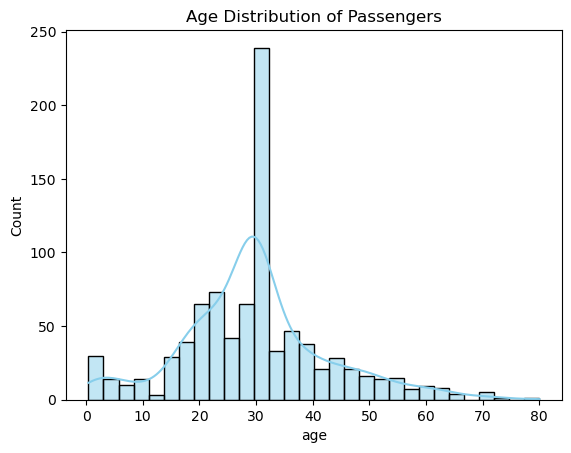

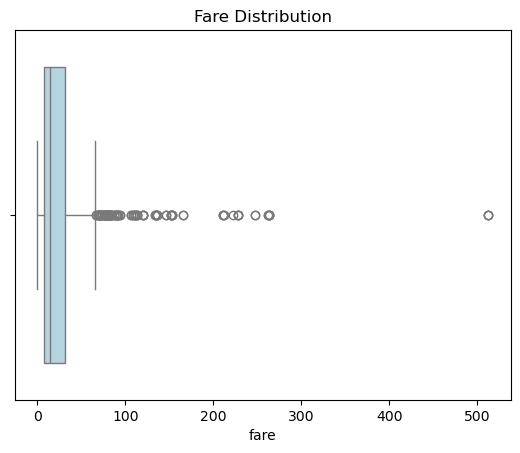

In [7]:
#univariate analysis - Numnerical Features 
num_cols =  df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#Histogram : Age
sns.histplot(df['age'],bins=30,kde = True, color='skyblue')
plt.title("Age Distribution of Passengers")
plt.show()

#Boxplot : Fare
sns.boxplot(x=df['fare'],color='lightblue')
plt.title('Fare Distribution')
plt.show()

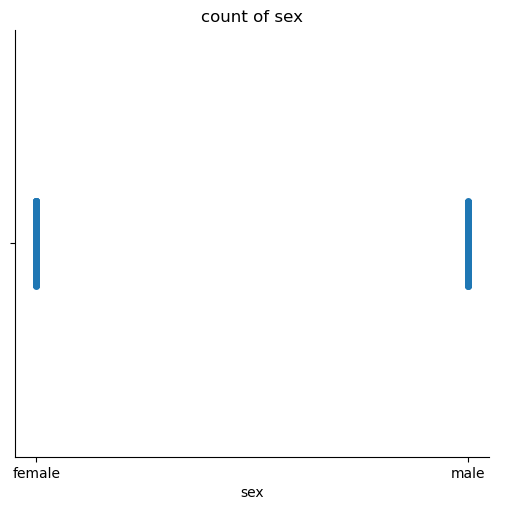

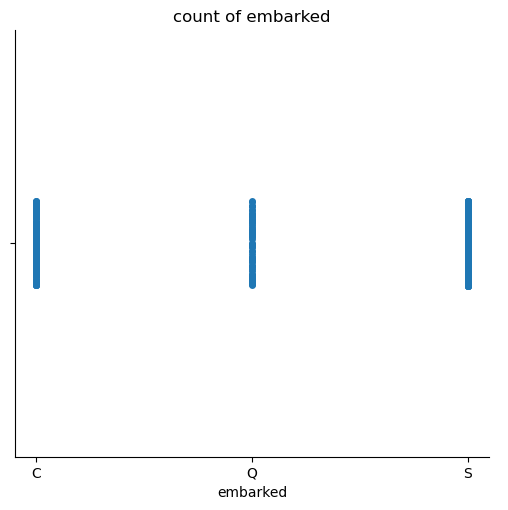

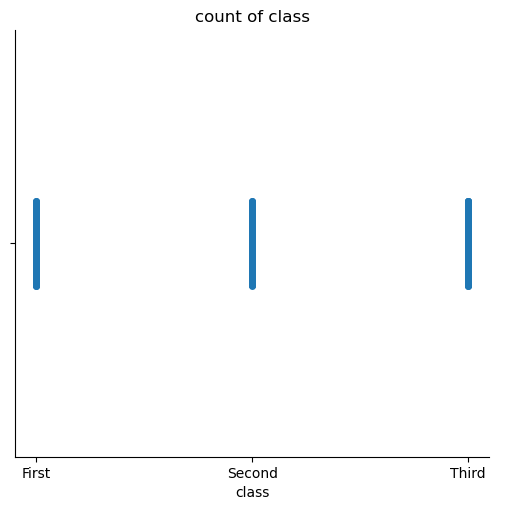

In [8]:
#univariate Analysis - Categorical Features 

cat_clos = df.select_dtypes('category').columns
for col in cat_clos:
    sns.catplot(x=col, data=df)
    plt.title(f'count of {col}')
    plt.show()


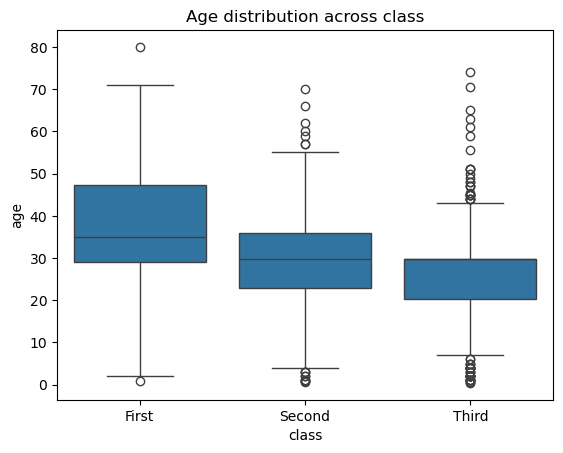

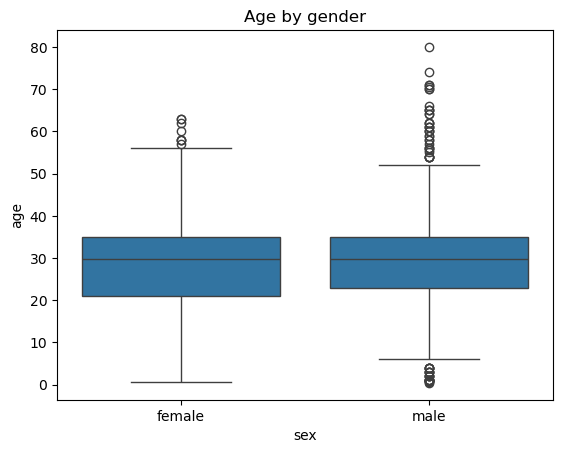

In [ ]:
#Bivariate Analysis - Numerical Vs categorical 
#Bivariate analysis -numerical vs categorical
sns.boxplot(x='class',y='age',data=df)
plt.title('Age distribution across class')
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title('Age by gender')
plt.show()






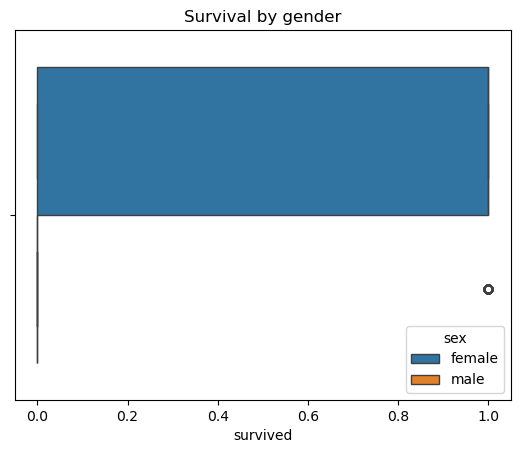

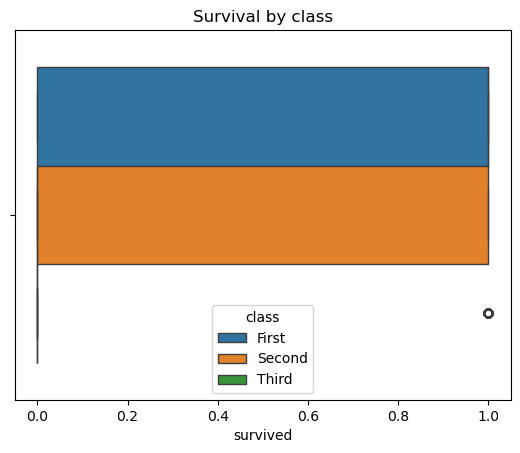

In [11]:
# Bivariate analysis -categorical vs categorical
sns.boxplot(x='survived',hue='sex',data=df)
plt.title('Survival by gender')
plt.show()
sns.boxplot(x='survived',hue='class',data=df)
plt.title('Survival by class')
plt.show()

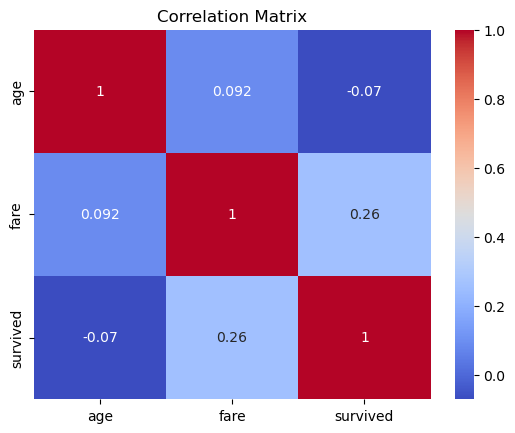

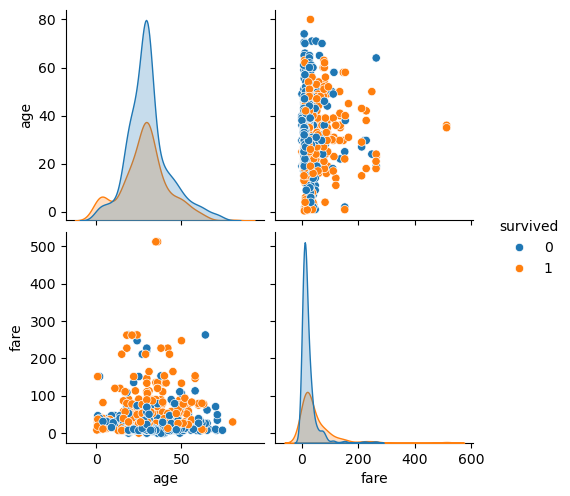

In [13]:
# corelation and multivariate analysis
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()


Number of outliers in fare column: 116


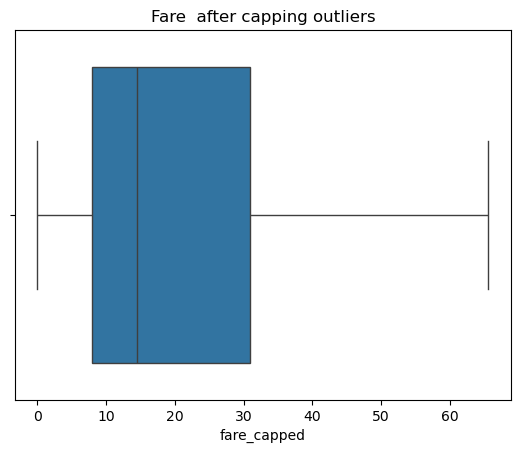

In [21]:
#outliers detction using IQR method
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1

lower=q1 - 1.5 * iqr
upper=q3 + 1.5 * iqr

outliers=df[(df['fare'] < lower) | (df['fare'] > upper)]
print("Number of outliers in fare column:",len(outliers))


#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title('Fare  after capping outliers')
plt.show()

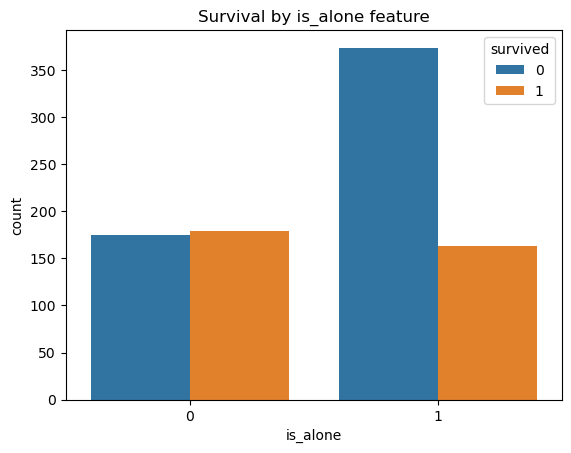

In [23]:
#feature engineering
#create new feature
df['family_size']=df['sibsp'] + df['parch'] + 1
df['is_alone']=(df['family_size']==1).astype(int)
df.head()

sns.countplot(x='is_alone',hue='survived',data=df)
plt.title('Survival by is_alone feature')
plt.show()

In [24]:
#export the cleaned dataset
df.to_csv('titanic_cleaned.csv',index=False)
print("cleaned dataset exported as titanic_cleaned.csv")

cleaned dataset exported as titanic_cleaned.csv
